In [62]:
# We import various modules to obtain the functionalities needed in the project and offered by various packages.
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from flask import Flask, json, jsonify
from matplotlib import pyplot as plt
from math import sqrt

In [70]:
# Dataset resides in the path indicated by the variable melbourne_file_path below.
melbourne_file_path="melbourne-housing-staticversion/melb_data.csv"
melbourne_data=pd.read_csv(melbourne_file_path)
melbourne_data.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [64]:
# Inspecting the data.
melbourne_data.shape
melbourne_data.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,11826.787073,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,6800.710448,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,5936.750000,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,11820.500000,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,17734.250000,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,23546.000000,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [71]:
# Below, we transform the data because there are various columns with different data types.
number = preprocessing.LabelEncoder()
melbourne_data=melbourne_data.astype(str)
melbourne_data=melbourne_data.apply(number.fit_transform)
melbourne_data=melbourne_data.fillna(-999)

In [72]:
# Preprocessing data. There are null values that need to filled up. Imputer() here uses mean as the measure of central tendency.
my_imputer = Imputer(strategy='mean', axis=0)
data_with_imputed_values = pd.DataFrame(my_imputer.fit_transform(melbourne_data))
data_with_imputed_values.columns = melbourne_data.columns

In [73]:
# We see that there is one extra column representing serial number, but is useless here when we already
# have pandas that offers indices.
melbourne_data.drop(melbourne_data.columns[0], axis=1, inplace=True)
melbourne_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,17365,3,0,503,1,29,45,80,53,...,1,1,417,613,144,31,3474,3842,2,177
1,0,8233,3,0,48,1,29,47,80,53,...,1,0,295,567,29,31,3719,3697,2,177
2,0,13470,4,0,489,3,29,48,80,53,...,2,0,219,116,29,31,3761,3724,2,177
3,0,12439,4,0,2247,0,29,48,80,53,...,2,1,1390,613,144,31,3398,3797,2,177
4,0,14496,5,0,590,4,178,49,80,53,...,1,3,150,103,139,31,3699,3716,2,177
5,0,3115,3,0,2394,1,124,52,80,53,...,1,0,368,613,144,31,3603,3749,2,177
6,0,3055,4,0,784,1,178,52,80,53,...,2,0,513,215,38,31,3555,3876,2,177
7,0,18075,3,0,619,1,178,56,80,53,...,1,3,528,27,21,31,3668,3754,2,177
8,0,7505,4,0,0,1,124,56,80,53,...,9,11,1449,613,144,33,7518,8168,2,177
9,0,5279,3,1,2073,1,124,56,80,53,...,9,11,1449,613,144,33,7518,8168,2,177


In [118]:
# features

features = ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']
 
# Use following to test a subset of features or a single feature.
# specific_feature = ['Rooms']

# target
target = 'Price'

In [119]:
# variable x represents the data of selected features.
x = melbourne_data[features]

# Uncomment below, and use a specific_feature.
# x = melbourne_data[specific_feature]

# variable y represents the data of the target.
y = melbourne_data[target]

# train_test_split() splits the dataset into training and test data with the share of 67% and 33% respectively. x_train, y_train,
# x_test, and y_test represent training feature, training target, testing feature, and testing target respectively.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)

In [120]:
# We invoke DecisionTreeRegressor() available from scikit-learn to implement Decision Tree Regression algorithm
# as the data is not categorical here, and subsequently feed the training data to it.
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [121]:
# Now, it's time to predict the testing target mapping to testing feature(s).
y_predict = dt_model.predict(x_test)

In [131]:
# To validate our model, we use root mean square error which indicates the standard deviation.
RMSE = sqrt(mean_squared_error(y_test, y_predict))
print(RMSE)

# With regression model, we can find mean absolute error.
mae = mean_absolute_error(y_test, y_predict)
print(mae)

# If we use DecisionTreeClassifier(), accuracy score tells us the accuracy of our model using the confusion matrix parameters.
#accuracy_score(y_true = y_test, y_pred = y_predict)

0.40253274906133135
0.187580299786


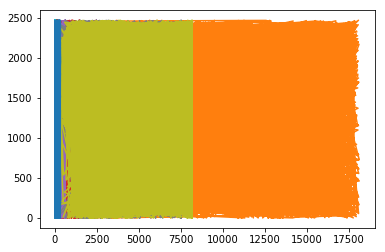

In [123]:
# We plot the graph for x_test and y_test, the actual data.
plt.plot(x_test, y_test)
plt.show()

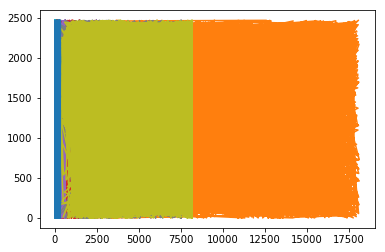

In [124]:
# We plot the graph for x_test and y_predict, the predicted data.
plt.plot(x_test, y_predict)
plt.show()

In [125]:
# Here we serialize our model using joblib from flask.
joblib.dump(dt_model, "decision_tree_model.pkl")

['decision_tree_model.pkl']

In [127]:
# Now, we desrialize the model and use it for prediction.
dt_model = joblib.load("./decision_tree_model.pkl")

# Below, we predict for a specific feature.
# json.dumps(dt_model.predict(10).tolist())

*Now, we demonstrate Random Forest model. In random forest model, we implement the concept of bagging where multiple decision trees are implemented and best out of them is used for prediction. This helps us in reducing the error and bettering our prediction and accuracy (with classifier) both. And hopefully, precision too!*

In [128]:
# We invoke RandomForestRegressor() available from scikit-learn to implement Random Forest Regressor algorithm, and
# subsequently feed the training data to it.
forest_model = RandomForestRegressor()
forest_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [129]:
# Now, it's time to predict the testing target mapping to testing feature(s).
y_predict = forest_model.predict(x_test)
y_predict

array([ 2335.9,  1962.8,  1588. , ...,  2262.7,  2089. ,   537. ])

In [132]:
# To validate our model, we use root mean square error which indicates the standard deviation.
RMSE = sqrt(mean_squared_error(y_test, y_predict))
print(RMSE)

# With regression model, we can find mean absolute error.
mae = mean_absolute_error(y_test, y_predict)
print(mae)

0.40253274906133135
0.187580299786


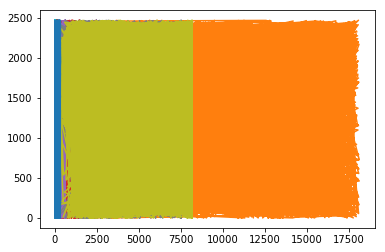

In [133]:
# We plot the graph for x_test and y_test, the actual data.
plt.plot(x_test, y_test)
plt.show()

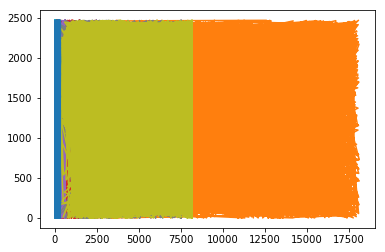

In [134]:
# We plot the graph for x_test and y_predict, the predicted data.
plt.plot(x_test, y_predict)
plt.show()

*Now, we demonstrate Linear Regression model to predict the prices.*

In [137]:
# We invoke LinearRegression() available from scikit-learn to implement Linear Regression algorithm, and
# subsequently feed the training data to it.
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [138]:
# Now, it's time to predict the testing target mapping to testing feature(s).
y_predict = lr_model.predict(x_test)
y_predict

array([ 2336.,  1962.,  1588., ...,  2263.,  2089.,   537.])

In [139]:
# To validate our model, we use root mean square error which indicates the standard deviation.
RMSE = sqrt(mean_squared_error(y_test, y_predict))
print(RMSE)

# With regression model, we can find mean absolute error.
mae = mean_absolute_error(y_test, y_predict)
print(mae)

1.6231412237329057e-12
1.31913023133e-12


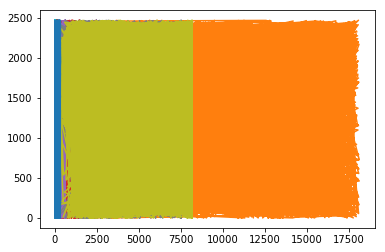

In [140]:
# We plot the graph for x_test and y_test, the actual data.
plt.plot(x_test, y_test)
plt.show()

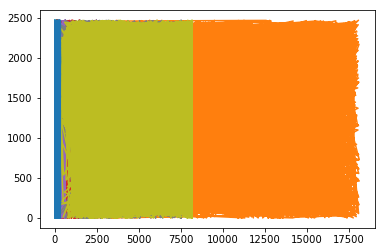

In [141]:
# We plot the graph for x_test and y_predict, the predicted data.
plt.plot(x_test, y_predict)
plt.show()

In [142]:
# We invoke GaussianNB() to implement Gaussian event model for Naive Bayes — available from scikit-learn
# to implement Linear Regression algorithm, and subsequently feed the training data to it.
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB(priors=None)

In [144]:
# Now, it's time to predict the testing target mapping to testing feature(s).
y_predict = nb_model.predict(x_test)
y_predict

array([2335, 1963, 1588, ..., 2265, 2089,  537], dtype=int64)

In [145]:
# To validate our model, we use root mean square error which indicates the standard deviation.
RMSE = sqrt(mean_squared_error(y_test, y_predict))
print(RMSE)

# With regression model, we can find mean absolute error.
mae = mean_absolute_error(y_test, y_predict)
print(mae)

0.9177148935952473
0.38329764454


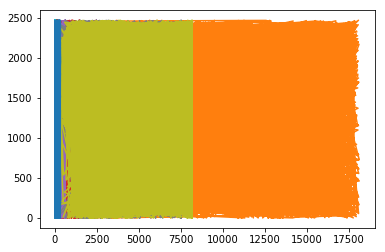

In [146]:
# We plot the graph for x_test and y_test, the actual data.
plt.plot(x_test, y_test)
plt.show()

In [ ]:
# We plot the graph for x_test and y_predict, the predicted data.
plt.plot(x_test, y_predict)
plt.show()